## PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [26]:
#create your first NLP in keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd

In [56]:
# function to display basics of dataset
def data_read(dataframe):
    print("shape of data",'\n',dataframe.shape,'\n')
    print("Columns in data","\n",dataframe.columns,'\n')
    print("DataTypes","\n",dataframe.info(),'\n')
    print("top 10 rows","\n",dataframe.head(),'\n')
    for col in dataframe.columns:
        if dataframe.dtypes[col]=='O':
            print(col,"has :",'\n',dataframe[col].unique())
         
        
        

In [64]:
def inspection(dataframe):
    import pandas as pd
    import seaborn as sns
    
    
    print("shape of data",'\n',dataframe.shape,'\n')
    print("Columns in data","\n",dataframe.columns,'\n')
    print("Data types of variables")
    print(dataframe.dtypes,'\n')
    print("Sample with missing Values:")
    print(dataframe.isnull().any(axis=1).sum(),'\n')
    print("Missing Values per Variable")
    print(dataframe.isnull().sum(),'\n')
    print("top 10 rows","\n",dataframe.head(),'\n')
    print("Heatmap for bank data having null values:")
    sns.heatmap(dataframe.isnull())
    

In [62]:
def unique_values(dataframe,variables):
    for v in variables:
        if dataframe.dtypes[v]=='O':
            print(" uniques values for Varirable: ",v)
            print( dataframe[v].unique(),"\n")

In [68]:
# for Encoding categorical variables
def encode_categoreis(dataframe, variables):
    from sklearn.preprocessing import OrdinalEncoder
    ord_enc=OrdinalEncoder()
    for v in variables:
        if dataframe.dtypes[v]=='O':
            name=v+'_code'
            dataframe[name]=ord_enc.fit_transform(dataframe[[v]])
            print('The encoded values for '+v+' are:')
            print(dataframe[name].unique(),'\n')
            print("_______________________________________________________________________________________________")

In [71]:
# load and read basic information on data
pd_forestfire=pd.read_csv('forestfires.csv')

shape of data 
 (517, 34) 

Columns in data 
 Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category', 'month_code', 'day_code',
       'size_category_code'],
      dtype='object') 

Data types of variables
month                  object
day                    object
FFMC                  float64
DMC                   float64
DC                    float64
ISI                   float64
temp                  float64
RH                      int64
wind                  float64
rain                  float64
area                  float64
dayfri                  int64
daymon                  int64
daysat                  int64
daysun                  int64
daythu                  int64
daytue                

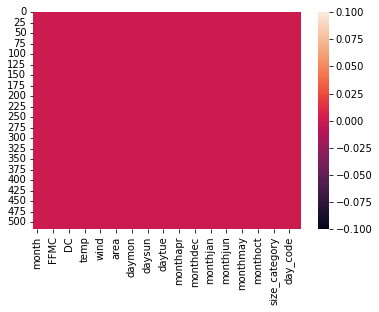

In [76]:
inspection(pd_forestfire)

In [75]:
unique_values(pd_forestfire,pd_forestfire.columns)

 uniques values for Varirable:  month
['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov'] 

 uniques values for Varirable:  day
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu'] 

 uniques values for Varirable:  size_category
['small' 'large'] 



In [73]:
encode_categoreis(pd_forestfire,pd_forestfire.columns)

The encoded values for month are:
[ 7. 10.  1. 11.  0.  6.  5.  3.  4.  2.  8.  9.] 

_______________________________________________________________________________________________
The encoded values for day are:
[0. 5. 2. 3. 1. 6. 4.] 

_______________________________________________________________________________________________
The encoded values for size_category are:
[1. 0.] 

_______________________________________________________________________________________________


In [74]:
pd_forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,month_code,day_code,size_category_code
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,1,0,0,0,0,small,7.0,0.0,1.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,1,0,small,10.0,5.0,1.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,1,0,small,10.0,2.0,1.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,1,0,0,0,0,small,7.0,0.0,1.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,1,0,0,0,0,small,7.0,3.0,1.0


In [79]:
pd_forestfire_drp_cols=pd_forestfire.drop(['month','day','size_category'],axis=1)

In [81]:
pd_forestfire_drp_cols.to_csv('forestfire_drp_cols.csv')

In [84]:
#fix random seed for reproducibility
numpy.random.seed()
dataset=numpy.loadtxt('forestfire_drp_cols.csv', delimiter=",",skiprows=1)

In [85]:
dataset

array([[  0. ,  86.2,  26.2, ...,   7. ,   0. ,   1. ],
       [  1. ,  90.6,  35.4, ...,  10. ,   5. ,   1. ],
       [  2. ,  90.6,  43.7, ...,  10. ,   2. ,   1. ],
       ...,
       [514. ,  81.6,  56.7, ...,   1. ,   3. ,   0. ],
       [515. ,  94.4, 146. , ...,   1. ,   2. ,   1. ],
       [516. ,  79.5,   3. , ...,   9. ,   5. ,   1. ]])

In [87]:
dataset.shape

(517, 32)

In [89]:
# split into input (x) and output(y) variables, here column 8 is output
x=dataset[:,0:31]
y=dataset[:,31]

In [90]:
x[0:10]

array([[0.000e+00, 8.620e+01, 2.620e+01, 9.430e+01, 5.100e+00, 8.200e+00,
        5.100e+01, 6.700e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.000e+00,
        0.000e+00],
       [1.000e+00, 9.060e+01, 3.540e+01, 6.691e+02, 6.700e+00, 1.800e+01,
        3.300e+01, 9.000e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+01,
        5.000e+00],
       [2.000e+00, 9.060e+01, 4.370e+01, 6.869e+02, 6.700e+00, 1.460e+01,
        3.300e+01, 1.300e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00

In [93]:
y[0:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [97]:
#create model
model=Sequential()
#creaete layers
model.add(Dense(12,input_dim=31, activation='relu'))#1st Layer
model.add(Dense(8, activation='relu'))#2nd layer
model.add(Dense(1,activation='sigmoid'))#3rd layer



In [98]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
#fit the model
history=model.fit(x,y,validation_split=0.33,epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 37ms/step - loss: 9.3501 - accuracy: 0.6012 - val_loss: 7.4715 - val_accuracy: 0.7310
Epoch 2/250
35/35 [==============================] - 0s 7ms/step - loss: 4.2241 - accuracy: 0.6301 - val_loss: 5.4375 - val_accuracy: 0.6608
Epoch 3/250
35/35 [==============================] - 0s 6ms/step - loss: 2.0864 - accuracy: 0.7601 - val_loss: 1.1074 - val_accuracy: 0.8012
Epoch 4/250
35/35 [==============================] - 0s 7ms/step - loss: 0.8749 - accuracy: 0.8035 - val_loss: 0.5476 - val_accuracy: 0.8246
Epoch 5/250
35/35 [==============================] - 0s 7ms/step - loss: 0.3192 - accuracy: 0.8988 - val_loss: 0.8063 - val_accuracy: 0.7427
Epoch 6/250
35/35 [==============================] - 0s 7ms/step - loss: 0.2619 - accuracy: 0.9277 - val_loss: 0.7637 - val_accuracy: 0.7368
Epoch 7/250
35/35 [==============================] - 0s 7ms/step - loss: 0.2669 - accuracy: 0.9075 - val_loss: 0.7892 - val_accuracy: 0.7485
Epoch 8/250


Epoch 59/250
35/35 [==============================] - 0s 6ms/step - loss: 0.1515 - accuracy: 0.9509 - val_loss: 0.9571 - val_accuracy: 0.8480
Epoch 60/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0502 - accuracy: 0.9769 - val_loss: 0.2736 - val_accuracy: 0.9123
Epoch 61/250
35/35 [==============================] - 0s 7ms/step - loss: 0.1083 - accuracy: 0.9653 - val_loss: 0.2475 - val_accuracy: 0.9123
Epoch 62/250
35/35 [==============================] - 0s 6ms/step - loss: 0.1352 - accuracy: 0.9595 - val_loss: 0.8913 - val_accuracy: 0.8480
Epoch 63/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0577 - accuracy: 0.9740 - val_loss: 0.5893 - val_accuracy: 0.8713
Epoch 64/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0525 - accuracy: 0.9769 - val_loss: 0.4988 - val_accuracy: 0.8889
Epoch 65/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0723 - accuracy: 0.9653 - val_loss: 0.2329 - val_accuracy: 0.9298
Epoch 

35/35 [==============================] - 0s 6ms/step - loss: 0.0304 - accuracy: 0.9855 - val_loss: 0.3050 - val_accuracy: 0.9123
Epoch 117/250
35/35 [==============================] - 0s 7ms/step - loss: 0.1892 - accuracy: 0.9480 - val_loss: 0.8437 - val_accuracy: 0.8596
Epoch 118/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0502 - accuracy: 0.9855 - val_loss: 0.2570 - val_accuracy: 0.9240
Epoch 119/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 0.9942 - val_loss: 0.5238 - val_accuracy: 0.9006
Epoch 120/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0169 - accuracy: 0.9942 - val_loss: 0.5338 - val_accuracy: 0.9006
Epoch 121/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0259 - accuracy: 0.9884 - val_loss: 0.3738 - val_accuracy: 0.8947
Epoch 122/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0600 - accuracy: 0.9769 - val_loss: 0.3019 - val_accuracy: 0.9123
Epoch 123/250

35/35 [==============================] - 0s 6ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.2104 - val_accuracy: 0.9357
Epoch 174/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0160 - accuracy: 0.9942 - val_loss: 0.6837 - val_accuracy: 0.8772
Epoch 175/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0292 - accuracy: 0.9942 - val_loss: 0.3303 - val_accuracy: 0.9181
Epoch 176/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.2141 - val_accuracy: 0.9357
Epoch 177/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0139 - accuracy: 0.9913 - val_loss: 0.1982 - val_accuracy: 0.9415
Epoch 178/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0113 - accuracy: 0.9942 - val_loss: 0.2952 - val_accuracy: 0.9240
Epoch 179/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0458 - accuracy: 0.9827 - val_loss: 0.2145 - val_accuracy: 0.9357
Epoch 180/250

35/35 [==============================] - 0s 7ms/step - loss: 0.0523 - accuracy: 0.9855 - val_loss: 0.5015 - val_accuracy: 0.9123
Epoch 231/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.3439 - val_accuracy: 0.9181
Epoch 232/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0138 - accuracy: 0.9913 - val_loss: 0.2612 - val_accuracy: 0.9240
Epoch 233/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0422 - accuracy: 0.9827 - val_loss: 0.4610 - val_accuracy: 0.9064
Epoch 234/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.4358 - val_accuracy: 0.9123
Epoch 235/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0074 - accuracy: 0.9971 - val_loss: 0.5272 - val_accuracy: 0.9123
Epoch 236/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0264 - accuracy: 0.9913 - val_loss: 0.2915 - val_accuracy: 0.9240
Epoch 237/250

In [100]:
# Evaluate model
scores=model.evaluate(x,y)
print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.1297 - accuracy: 0.9613
[0.12967772781848907, 0.9613152742385864]
accuracy: 96.13%


In [101]:
history.history

{'loss': [9.350112915039062,
  4.224086284637451,
  2.086354970932007,
  0.8748637437820435,
  0.3191845715045929,
  0.26187342405319214,
  0.26693645119667053,
  0.2402811497449875,
  0.15396180748939514,
  0.18499299883842468,
  0.14319439232349396,
  0.13052034378051758,
  0.12774740159511566,
  0.11740659922361374,
  0.11980070173740387,
  0.10816477984189987,
  0.09694287925958633,
  0.12078526616096497,
  0.0942358523607254,
  0.07938588410615921,
  0.08467657119035721,
  0.12878933548927307,
  0.0656256228685379,
  0.09779934585094452,
  0.10058221220970154,
  0.12662503123283386,
  0.14582756161689758,
  0.09310469776391983,
  0.0648999735713005,
  0.08013220131397247,
  0.07777350395917892,
  0.05136905610561371,
  0.07669401913881302,
  0.07043690979480743,
  0.0837695449590683,
  0.056201886385679245,
  0.18905383348464966,
  0.06416869908571243,
  0.07699740678071976,
  0.043495096266269684,
  0.05329889431595802,
  0.06989769637584686,
  0.07660537958145142,
  0.0716482698

In [103]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

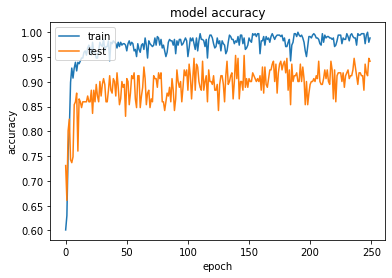

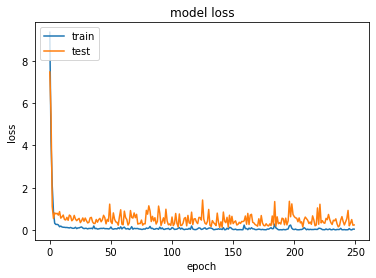

In [104]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### run the model with 500 epochs

In [108]:
#fit the model
history=model.fit(x,y,validation_split=0.33,epochs=500, batch_size=10)

Epoch 1/500
35/35 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.9942 - val_loss: 0.3690 - val_accuracy: 0.9591
Epoch 2/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 0.9971 - val_loss: 0.4964 - val_accuracy: 0.9357
Epoch 3/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 0.9942 - val_loss: 0.3614 - val_accuracy: 0.9591
Epoch 4/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 0.9971 - val_loss: 0.3641 - val_accuracy: 0.9474
Epoch 5/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0046 - accuracy: 0.9971 - val_loss: 0.3743 - val_accuracy: 0.9474
Epoch 6/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 0.9971 - val_loss: 0.3469 - val_accuracy: 0.9474
Epoch 7/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.9971 - val_loss: 0.9889 - val_accuracy: 0.9006
Epoch 8/500
3

Epoch 59/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.8015 - val_accuracy: 0.9181
Epoch 60/500
35/35 [==============================] - 0s 8ms/step - loss: 0.0123 - accuracy: 0.9913 - val_loss: 0.3978 - val_accuracy: 0.9357
Epoch 61/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.9971 - val_loss: 0.8287 - val_accuracy: 0.9064
Epoch 62/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9884 - val_loss: 0.3699 - val_accuracy: 0.9474
Epoch 63/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.9942 - val_loss: 0.4072 - val_accuracy: 0.9298
Epoch 64/500
35/35 [==============================] - 0s 8ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.5840 - val_accuracy: 0.9240
Epoch 65/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0160 - accuracy: 0.9971 - val_loss: 0.5420 - val_accuracy: 0.9298
Epoch 

35/35 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.9971 - val_loss: 0.3556 - val_accuracy: 0.9474
Epoch 117/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0207 - accuracy: 0.9942 - val_loss: 0.3758 - val_accuracy: 0.9474
Epoch 118/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 0.9942 - val_loss: 0.5771 - val_accuracy: 0.9298
Epoch 119/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0158 - accuracy: 0.9942 - val_loss: 0.8075 - val_accuracy: 0.9181
Epoch 120/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.6419 - val_accuracy: 0.9123
Epoch 121/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3801 - val_accuracy: 0.9474
Epoch 122/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.3678 - val_accuracy: 0.9415
Epoch 123/500

35/35 [==============================] - 0s 6ms/step - loss: 0.0706 - accuracy: 0.9798 - val_loss: 0.7483 - val_accuracy: 0.9123
Epoch 174/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0847 - accuracy: 0.9769 - val_loss: 0.5082 - val_accuracy: 0.9240
Epoch 175/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0233 - accuracy: 0.9971 - val_loss: 0.6095 - val_accuracy: 0.9240
Epoch 176/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.9971 - val_loss: 0.6649 - val_accuracy: 0.9123
Epoch 177/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0738 - accuracy: 0.9798 - val_loss: 0.3315 - val_accuracy: 0.9591
Epoch 178/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0851 - accuracy: 0.9827 - val_loss: 0.3143 - val_accuracy: 0.9591
Epoch 179/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0127 - accuracy: 0.9971 - val_loss: 0.7403 - val_accuracy: 0.9181
Epoch 180/500

35/35 [==============================] - 0s 7ms/step - loss: 0.0743 - accuracy: 0.9855 - val_loss: 0.7943 - val_accuracy: 0.9064
Epoch 231/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.7922 - val_accuracy: 0.9064
Epoch 232/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0041 - accuracy: 0.9971 - val_loss: 0.7733 - val_accuracy: 0.9181
Epoch 233/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0052 - accuracy: 0.9971 - val_loss: 0.6729 - val_accuracy: 0.9240
Epoch 234/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.9975 - val_accuracy: 0.9064
Epoch 235/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8446 - val_accuracy: 0.9006
Epoch 236/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 0.9971 - val_loss: 0.6726 - val_accuracy: 0.9181
Epoch 237/500

35/35 [==============================] - 0s 6ms/step - loss: 0.0894 - accuracy: 0.9798 - val_loss: 0.7992 - val_accuracy: 0.9064
Epoch 288/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.5235 - val_accuracy: 0.9298
Epoch 289/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0137 - accuracy: 0.9942 - val_loss: 0.8089 - val_accuracy: 0.9064
Epoch 290/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0079 - accuracy: 0.9942 - val_loss: 0.6034 - val_accuracy: 0.9181
Epoch 291/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.6621 - val_accuracy: 0.9123
Epoch 292/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0032 - accuracy: 0.9971 - val_loss: 0.5891 - val_accuracy: 0.9181
Epoch 293/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0140 - accuracy: 0.9942 - val_loss: 0.6318 - val_accuracy: 0.9181
Epoch 294/500

35/35 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.9165 - val_accuracy: 0.9064
Epoch 345/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.7555 - val_accuracy: 0.9006
Epoch 346/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.7534 - val_accuracy: 0.9006
Epoch 347/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.6765 - val_accuracy: 0.9123
Epoch 348/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0047 - accuracy: 0.9971 - val_loss: 1.2100 - val_accuracy: 0.9064
Epoch 349/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0247 - accuracy: 0.9942 - val_loss: 0.9538 - val_accuracy: 0.9064
Epoch 350/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0149 - accuracy: 0.9942 - val_loss: 1.1344 - val_accuracy: 0.9064
Epoch 351/500

35/35 [==============================] - 0s 7ms/step - loss: 0.0305 - accuracy: 0.9884 - val_loss: 1.0359 - val_accuracy: 0.9123
Epoch 402/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.9884 - val_loss: 0.5839 - val_accuracy: 0.9181
Epoch 403/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.9971 - val_loss: 0.5165 - val_accuracy: 0.9357
Epoch 404/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.5909 - val_accuracy: 0.9181
Epoch 405/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0098 - accuracy: 0.9942 - val_loss: 0.7390 - val_accuracy: 0.9123
Epoch 406/500
35/35 [==============================] - 0s 5ms/step - loss: 0.0104 - accuracy: 0.9971 - val_loss: 0.7372 - val_accuracy: 0.9123
Epoch 407/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0158 - accuracy: 0.9971 - val_loss: 0.5544 - val_accuracy: 0.9298
Epoch 408/500

35/35 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.9210 - val_accuracy: 0.9006
Epoch 459/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.6946 - val_accuracy: 0.9298
Epoch 460/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.0594 - val_accuracy: 0.9064
Epoch 461/500
35/35 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.7947 - val_accuracy: 0.9123
Epoch 462/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.6597 - val_accuracy: 0.9298
Epoch 463/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0289 - accuracy: 0.9913 - val_loss: 0.6664 - val_accuracy: 0.9357
Epoch 464/500
35/35 [==============================] - 0s 7ms/step - loss: 0.0223 - accuracy: 0.9913 - val_loss: 0.7108 - val_accuracy: 0.9240
Epoch 465/500

In [106]:
# Evaluate model
scores=model.evaluate(x,y)
print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9671
[0.22200842201709747, 0.967117965221405]
accuracy: 96.71%


#### by increasing number of epochs we have slight iprovement in accuracy to 97.71%

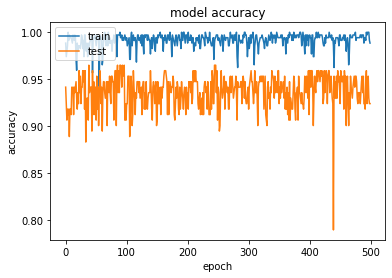

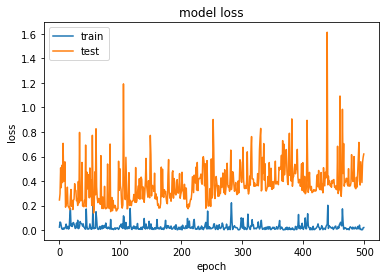

In [107]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### increase number of layers

In [111]:
#create model in creaing number of layers 
model=Sequential()
#creaete layers
model.add(Dense(12,input_dim=31, activation='relu'))#1st Layer
model.add(Dense(8, activation='relu'))#2nd layer
model.add(Dense(8, activation='relu'))#3rd layer
model.add(Dense(8, activation='relu'))#4th layer
model.add(Dense(1,activation='sigmoid'))#5th layer


In [112]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
#fit the model
history=model.fit(x,y,validation_split=0.33,epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 18ms/step - loss: 0.7521 - accuracy: 0.7399 - val_loss: 0.8171 - val_accuracy: 0.6608
Epoch 2/250
35/35 [==============================] - 0s 7ms/step - loss: 0.6182 - accuracy: 0.7861 - val_loss: 0.7896 - val_accuracy: 0.6784
Epoch 3/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5346 - accuracy: 0.7659 - val_loss: 0.6628 - val_accuracy: 0.6901
Epoch 4/250
35/35 [==============================] - 0s 7ms/step - loss: 0.4602 - accuracy: 0.7775 - val_loss: 0.6567 - val_accuracy: 0.6959
Epoch 5/250
35/35 [==============================] - 0s 6ms/step - loss: 0.4189 - accuracy: 0.7832 - val_loss: 0.6488 - val_accuracy: 0.7310
Epoch 6/250
35/35 [==============================] - 0s 7ms/step - loss: 0.4008 - accuracy: 0.7746 - val_loss: 0.7232 - val_accuracy: 0.6959
Epoch 7/250
35/35 [==============================] - 0s 7ms/step - loss: 0.3809 - accuracy: 0.7919 - val_loss: 0.6797 - val_accuracy: 0.6959
Epoch 8/250


Epoch 59/250
35/35 [==============================] - 0s 7ms/step - loss: 0.1441 - accuracy: 0.9480 - val_loss: 1.6922 - val_accuracy: 0.7368
Epoch 60/250
35/35 [==============================] - 0s 8ms/step - loss: 0.1397 - accuracy: 0.9480 - val_loss: 1.5692 - val_accuracy: 0.8070
Epoch 61/250
35/35 [==============================] - 0s 8ms/step - loss: 0.1521 - accuracy: 0.9306 - val_loss: 1.5876 - val_accuracy: 0.7602
Epoch 62/250
35/35 [==============================] - 0s 7ms/step - loss: 0.1692 - accuracy: 0.9277 - val_loss: 1.1625 - val_accuracy: 0.7895
Epoch 63/250
35/35 [==============================] - 0s 7ms/step - loss: 0.1600 - accuracy: 0.9277 - val_loss: 1.0719 - val_accuracy: 0.7953
Epoch 64/250
35/35 [==============================] - 0s 7ms/step - loss: 0.1324 - accuracy: 0.9451 - val_loss: 1.2769 - val_accuracy: 0.7836
Epoch 65/250
35/35 [==============================] - 0s 8ms/step - loss: 0.1434 - accuracy: 0.9306 - val_loss: 1.5515 - val_accuracy: 0.7544
Epoch 

35/35 [==============================] - 0s 7ms/step - loss: 0.0391 - accuracy: 0.9884 - val_loss: 1.1609 - val_accuracy: 0.8772
Epoch 117/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0721 - accuracy: 0.9798 - val_loss: 1.0763 - val_accuracy: 0.8480
Epoch 118/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0648 - accuracy: 0.9740 - val_loss: 1.3186 - val_accuracy: 0.8655
Epoch 119/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0387 - accuracy: 0.9798 - val_loss: 1.0692 - val_accuracy: 0.8830
Epoch 120/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0329 - accuracy: 0.9855 - val_loss: 1.0675 - val_accuracy: 0.8772
Epoch 121/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0450 - accuracy: 0.9884 - val_loss: 1.1252 - val_accuracy: 0.8713
Epoch 122/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0284 - accuracy: 0.9884 - val_loss: 1.2639 - val_accuracy: 0.8713
Epoch 123/250

35/35 [==============================] - 0s 7ms/step - loss: 0.0308 - accuracy: 0.9855 - val_loss: 1.1905 - val_accuracy: 0.8947
Epoch 174/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0334 - accuracy: 0.9913 - val_loss: 1.1907 - val_accuracy: 0.8830
Epoch 175/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0238 - accuracy: 0.9913 - val_loss: 1.2262 - val_accuracy: 0.8830
Epoch 176/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 1.3855 - val_accuracy: 0.8830
Epoch 177/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0255 - accuracy: 0.9913 - val_loss: 1.3448 - val_accuracy: 0.8889
Epoch 178/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0307 - accuracy: 0.9884 - val_loss: 1.2217 - val_accuracy: 0.8772
Epoch 179/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0245 - accuracy: 0.9942 - val_loss: 1.4267 - val_accuracy: 0.8772
Epoch 180/250

35/35 [==============================] - 0s 7ms/step - loss: 0.0296 - accuracy: 0.9855 - val_loss: 0.8711 - val_accuracy: 0.8947
Epoch 231/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0296 - accuracy: 0.9884 - val_loss: 0.9421 - val_accuracy: 0.8947
Epoch 232/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0304 - accuracy: 0.9884 - val_loss: 1.0833 - val_accuracy: 0.8830
Epoch 233/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0663 - accuracy: 0.9769 - val_loss: 0.9123 - val_accuracy: 0.8947
Epoch 234/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.9884 - val_loss: 0.8183 - val_accuracy: 0.8947
Epoch 235/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0260 - accuracy: 0.9942 - val_loss: 0.9975 - val_accuracy: 0.8830
Epoch 236/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0401 - accuracy: 0.9798 - val_loss: 1.0039 - val_accuracy: 0.8830
Epoch 237/250

In [114]:
# Evaluate model
scores=model.evaluate(x,y)
print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.3197 - accuracy: 0.9478
[0.31967976689338684, 0.9477756023406982]
accuracy: 94.78%


#### with increased number of layers accuracy decreases to 94.78% from 96.31%

In [118]:
#create model in creaing number of layers 
model=Sequential()
#creaete layers
model.add(Dense(12,input_dim=31, activation='relu'))#1st Layer
model.add(Dense(8, activation='relu'))#2nd layer
model.add(Dense(8, activation='relu'))#3rd layer
model.add(Dense(1,activation='sigmoid'))#4th layer
model.add(Dense(8, activation='relu'))#5th layer
model.add(Dense(1,activation='sigmoid'))#6th layer

In [119]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [120]:
#fit the model
history=model.fit(x,y,validation_split=0.33,epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 17ms/step - loss: 0.6155 - accuracy: 0.7572 - val_loss: 0.6377 - val_accuracy: 0.6784
Epoch 2/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5929 - accuracy: 0.7572 - val_loss: 0.6304 - val_accuracy: 0.6784
Epoch 3/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5773 - accuracy: 0.7572 - val_loss: 0.6282 - val_accuracy: 0.6784
Epoch 4/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5675 - accuracy: 0.7572 - val_loss: 0.6287 - val_accuracy: 0.6784
Epoch 5/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5617 - accuracy: 0.7572 - val_loss: 0.6303 - val_accuracy: 0.6784
Epoch 6/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5582 - accuracy: 0.7572 - val_loss: 0.6329 - val_accuracy: 0.6784
Epoch 7/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5568 - accuracy: 0.7572 - val_loss: 0.6359 - val_accuracy: 0.6784
Epoch 8/250


Epoch 59/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5545 - accuracy: 0.7572 - val_loss: 0.6441 - val_accuracy: 0.6784
Epoch 60/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5544 - accuracy: 0.7572 - val_loss: 0.6446 - val_accuracy: 0.6784
Epoch 61/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5546 - accuracy: 0.7572 - val_loss: 0.6441 - val_accuracy: 0.6784
Epoch 62/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5543 - accuracy: 0.7572 - val_loss: 0.6448 - val_accuracy: 0.6784
Epoch 63/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5545 - accuracy: 0.7572 - val_loss: 0.6452 - val_accuracy: 0.6784
Epoch 64/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5548 - accuracy: 0.7572 - val_loss: 0.6435 - val_accuracy: 0.6784
Epoch 65/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5545 - accuracy: 0.7572 - val_loss: 0.6452 - val_accuracy: 0.6784
Epoch 

35/35 [==============================] - 0s 7ms/step - loss: 0.5546 - accuracy: 0.7572 - val_loss: 0.6427 - val_accuracy: 0.6784
Epoch 117/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5543 - accuracy: 0.7572 - val_loss: 0.6435 - val_accuracy: 0.6784
Epoch 118/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5544 - accuracy: 0.7572 - val_loss: 0.6446 - val_accuracy: 0.6784
Epoch 119/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5546 - accuracy: 0.7572 - val_loss: 0.6430 - val_accuracy: 0.6784
Epoch 120/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5544 - accuracy: 0.7572 - val_loss: 0.6451 - val_accuracy: 0.6784
Epoch 121/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5545 - accuracy: 0.7572 - val_loss: 0.6444 - val_accuracy: 0.6784
Epoch 122/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5545 - accuracy: 0.7572 - val_loss: 0.6450 - val_accuracy: 0.6784
Epoch 123/250

35/35 [==============================] - 0s 7ms/step - loss: 0.5546 - accuracy: 0.7572 - val_loss: 0.6438 - val_accuracy: 0.6784
Epoch 174/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5548 - accuracy: 0.7572 - val_loss: 0.6453 - val_accuracy: 0.6784
Epoch 175/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5546 - accuracy: 0.7572 - val_loss: 0.6445 - val_accuracy: 0.6784
Epoch 176/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5545 - accuracy: 0.7572 - val_loss: 0.6442 - val_accuracy: 0.6784
Epoch 177/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5546 - accuracy: 0.7572 - val_loss: 0.6436 - val_accuracy: 0.6784
Epoch 178/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5548 - accuracy: 0.7572 - val_loss: 0.6423 - val_accuracy: 0.6784
Epoch 179/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5546 - accuracy: 0.7572 - val_loss: 0.6427 - val_accuracy: 0.6784
Epoch 180/250

35/35 [==============================] - 0s 7ms/step - loss: 0.5549 - accuracy: 0.7572 - val_loss: 0.6427 - val_accuracy: 0.6784
Epoch 231/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5546 - accuracy: 0.7572 - val_loss: 0.6444 - val_accuracy: 0.6784
Epoch 232/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5546 - accuracy: 0.7572 - val_loss: 0.6425 - val_accuracy: 0.6784
Epoch 233/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5544 - accuracy: 0.7572 - val_loss: 0.6432 - val_accuracy: 0.6784
Epoch 234/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5547 - accuracy: 0.7572 - val_loss: 0.6454 - val_accuracy: 0.6784
Epoch 235/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5544 - accuracy: 0.7572 - val_loss: 0.6443 - val_accuracy: 0.6784
Epoch 236/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5544 - accuracy: 0.7572 - val_loss: 0.6436 - val_accuracy: 0.6784
Epoch 237/250

In [121]:
# Evaluate model
scores=model.evaluate(x,y)
print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 4ms/step - loss: 0.5835 - accuracy: 0.7311
[0.5835274457931519, 0.731141209602356]
accuracy: 73.11%


### accuracy decreased to 73.11 % with aaddition of additional layers and an sigmoid function in middle